## Question 1 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Initialize some constants 
mu = 0.05288
e = 0.0549
a = 1

# Initial condition 
x = a*(1-e)
y = 0 
v_x = 0
v_y = np.sqrt(mu*(1+e)/(a*(1-e)))

### Euler Method

In [ ]:
class moon:

  def __init__(self,init_x,init_y,init_vx,init_vy,mu,tau,iteration):
    # constant
    self.mu = mu 
    self.tau = tau
    self.iteration = iteration

    # list that stores the values 
    self.xlist = [init_x]
    self.ylist = [init_y]
    self.vxlist = [init_vx]
    self.vylist = [init_vy]
    self.axlist = []
    self.aylist = []
    self.timelist = []
  
  def acceleration(self,x,y): # Be careful about the 2nd derivatives definition...
    a_x = -self.mu*(x)/((x**2+y**2)**(3/2))
    a_y = -self.mu*(y)/((x**2+y**2)**(3/2))
    return a_x,a_y

In [ ]:
def Euler_method(data_dict,tau,iteration):

  for i in range(1,iteration):
    data_dict.timelist.append(i*tau)

    #Update the position 
    x_new = data_dict.xlist[i-1] + tau*data_dict.vxlist[i-1]
    y_new = data_dict.ylist[i-1] + tau*data_dict.vylist[i-1]

    #Find new acceleration values 
    a_x_new,a_y_new = data_dict.acceleration(data_dict.xlist[i-1],data_dict.ylist[i-1])

    #Update the velocity # Remember to find the acceleration before finding the velocity 
    vx_new = data_dict.vxlist[i-1] + tau*a_x_new
    vy_new = data_dict.vylist[i-1] + tau*a_y_new

    #Add the data back to the data_dict 
    data_dict.xlist.append(x_new)
    data_dict.ylist.append(y_new)

    data_dict.vxlist.append(vx_new)
    data_dict.vylist.append(vy_new)

  return data_dict


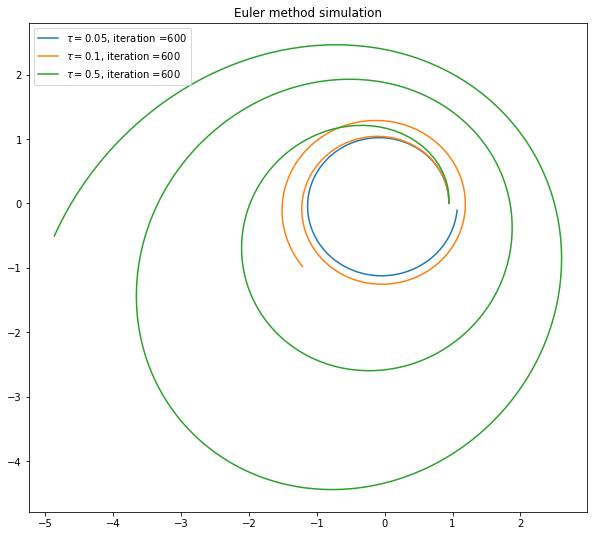

In [ ]:
# Set the tau and iteration
moon_1 = moon(x,y,0,v_y,mu,0.05,600)
moon_2 = moon(x,y,0,v_y,mu,0.1,600)
moon_3 = moon(x,y,0,v_y,mu,0.5,600)

# Update the position of different moons 
moon_1 = Euler_method(moon_1,moon_1.tau,moon_1.iteration)
moon_2 = Euler_method(moon_2,moon_2.tau,moon_2.iteration)
moon_3 = Euler_method(moon_3,moon_3.tau,moon_3.iteration)

#Plot graph 
plt.figure(figsize=(10,9))
plt.title("Euler method simulation")
plt.plot(moon_1.xlist,moon_1.ylist,label=fr"$\tau = {moon_1.tau}$, iteration ={moon_1.iteration}")
plt.plot(moon_2.xlist,moon_2.ylist,label=fr"$\tau = {moon_2.tau}$, iteration ={moon_2.iteration}")
plt.plot(moon_3.xlist,moon_3.ylist,label=fr"$\tau = {moon_3.tau}$, iteration ={moon_3.iteration}")
plt.legend()
plt.show()


### Velocity Verlet Method

In [ ]:
def Velocity_Verlet_Method(data_dict,tau,iteration):

  a_x_0,a_y_0 = data_dict.acceleration(data_dict.xlist[0],data_dict.ylist[0])
  data_dict.axlist.append(a_x_0)
  data_dict.aylist.append(a_y_0)

  for i in range(1,iteration):
    data_dict.timelist.append(i*tau)

    #Update the position 
    x_new = data_dict.xlist[i-1] + tau*data_dict.vxlist[i-1] + 0.5*np.power(tau,2)*data_dict.axlist[i-1]
    y_new = data_dict.ylist[i-1] + tau*data_dict.vylist[i-1] + 0.5*np.power(tau,2)*data_dict.aylist[i-1]

    #Update the acceleration (a_n+1)
    a_x_n_add_1,a_y_n_add_1 = data_dict.acceleration(x_new,y_new)

    #Update the velocity  
    vx_new = data_dict.vxlist[i-1] + 0.5*tau*(data_dict.axlist[i-1] + a_x_n_add_1)
    vy_new = data_dict.vylist[i-1] + 0.5*tau*(data_dict.aylist[i-1] + a_y_n_add_1)

    #Add the data back to the data_dict 
    data_dict.xlist.append(x_new)
    data_dict.ylist.append(y_new)

    data_dict.vxlist.append(vx_new)
    data_dict.vylist.append(vy_new)

    data_dict.axlist.append(a_x_n_add_1)
    data_dict.aylist.append(a_y_n_add_1)

  return data_dict

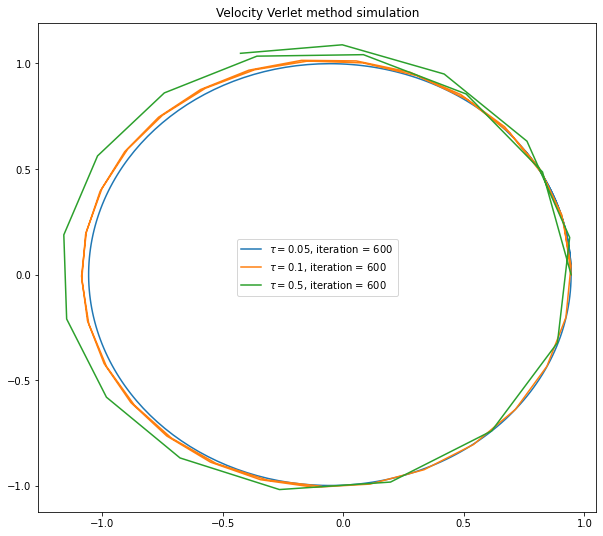

In [ ]:
# Set the tau and iteration
moon_1vv = moon(x,y,0,v_y,mu,0.1,300)
moon_2vv = moon(x,y,0,v_y,mu,1,50)
moon_3vv = moon(x,y,0,v_y,mu,2,20)

# Update the position of different moons 
moon_1vv = Velocity_Verlet_Method(moon_1vv,moon_1vv.tau,moon_1vv.iteration)
moon_2vv = Velocity_Verlet_Method(moon_2vv,moon_2vv.tau,moon_2vv.iteration)
moon_3vv = Velocity_Verlet_Method(moon_3vv,moon_3vv.tau,moon_3vv.iteration)

#Plot graph 
plt.figure(figsize=(10,9))
plt.title("Velocity Verlet method simulation")
plt.plot(moon_1vv.xlist,moon_1vv.ylist,label=fr"$\tau = {moon_1.tau}$, iteration = {moon_1.iteration}")
plt.plot(moon_2vv.xlist,moon_2vv.ylist,label=fr"$\tau = {moon_2.tau}$, iteration = {moon_2.iteration}")
plt.plot(moon_3vv.xlist,moon_3vv.ylist,label=fr"$\tau = {moon_3.tau}$, iteration = {moon_3.iteration}")
plt.legend()
plt.show()

### Runge Kutta Method 

In [ ]:
def acceleration(x,y,mu): # Be careful about the 2nd derivatives definition...
  a_x = (-mu/np.power((x**2+y**2),1.5))*x
  a_y = (-mu/np.power((x**2+y**2),1.5))*y
  return a_x,a_y

In [ ]:
def Runge_Kutta_4th_order(x_rk,y_rk,vx_rk,vy_rk,t_rk,tau,iteration,mu=0.5288):

  for i in range(1,iteration):
    t_rk.append(tau*i)

    k1x=tau*vx_rk[i-1]
    k1y=tau*vy_rk[i-1]
    ax_1,ay_1= acceleration(x_rk[i-1],y_rk[i-1],mu)
    l1x=tau*ax_1
    l1y=tau*ay_1
    
    k2x=tau*(vx_rk[i-1]+0.5*l1x)
    k2y=tau*(vy_rk[i-1]+0.5*l1y)
    ax_2,ay_2= acceleration(x_rk[i-1]+0.5*k1x,y_rk[i-1]+0.5*k1y,mu)
    l2x=tau*ax_2
    l2y=tau*ay_2

    k3x=tau*(vx_rk[i-1]+0.5*l2x)
    k3y=tau*(vy_rk[i-1]+0.5*l2y)
    ax_3,ay_3= acceleration(x_rk[i-1]+0.5*k2x,y_rk[i-1]+0.5*k2y,mu)
    l3x=tau*ax_3
    l3y=tau*ay_3

    k4x=tau*(vx_rk[i-1]+l3x)
    k4y=tau*(vy_rk[i-1]+l3y)
    ax_4,ay_4= acceleration(x_rk[i-1]+k3x,y_rk[i-1]+k3y,mu)
    l4x=tau*ax_4
    l4y=tau*ay_4
    
    x_rk.append(x_rk[i-1]+(1/6)*(k1x+2*k2x+2*k3x+k4x))
    vx_rk.append(vx_rk[i-1]+(1/6)*(l1x+2*l2x+2*l3x+l4x))
    y_rk.append(y_rk[i-1]+(1/6)*(k1y+2*k2y+2*k3y+k4y))
    vy_rk.append(vy_rk[i-1]+(1/6)*(l1y+2*l2y+2*l3y+l4y))
  
  return x_rk,y_rk,vx_rk,vy_rk,t_rk

In [ ]:
tau = 0.5
iteration = 100
x_rk=[a*(1-e)]
y_rk=[y]
vx_rk=[v_x]
vy_rk=[v_y]
t_rk=[0]

tau1 = 1
iteration1 = 50
x_rk1=[a*(1-e)]
y_rk1=[y]
vx_rk1=[v_x]
vy_rk1=[v_y]
t_rk1=[0]

tau3 = 3
iteration3 = 10
x_rk3=[a*(1-e)]
y_rk3=[y]
vx_rk3=[v_x]
vy_rk3=[v_y]
t_rk3=[0]


x_rk,y_rk,vx_rk,vy_rk,t_rk = Runge_Kutta_4th_order(x_rk,y_rk,vx_rk,vy_rk,t_rk,tau,iteration,mu=mu)
x_rk1,y_rk1,vx_rk1,vy_rk1,t_rk1 = Runge_Kutta_4th_order(x_rk1,y_rk1,vx_rk1,vy_rk1,t_rk1,tau1,iteration1,mu=mu)
x_rk3,y_rk3,vx_rk3,vy_rk3,t_rk3 = Runge_Kutta_4th_order(x_rk3,y_rk3,vx_rk3,vy_rk3,t_rk3,tau3,iteration3,mu=mu)


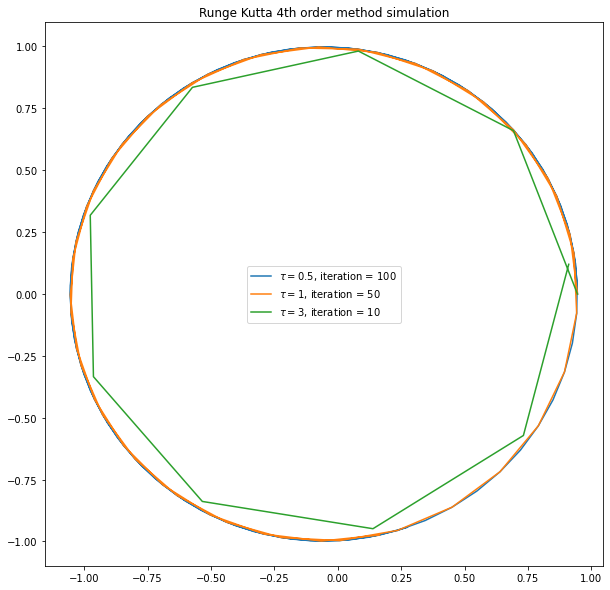

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Runge Kutta 4th order method simulation")
plt.plot(x_rk,y_rk,label=fr"$\tau = {tau}$, iteration = {iteration}")
plt.plot(x_rk1,y_rk1,label=fr"$\tau = {tau1}$, iteration = {iteration1}")
plt.plot(x_rk3,y_rk3,label=fr"$\tau = {tau3}$, iteration = {iteration3}")
plt.legend()
plt.show()

### Comparsion
Now we plot all the data of all three methods in the following part,

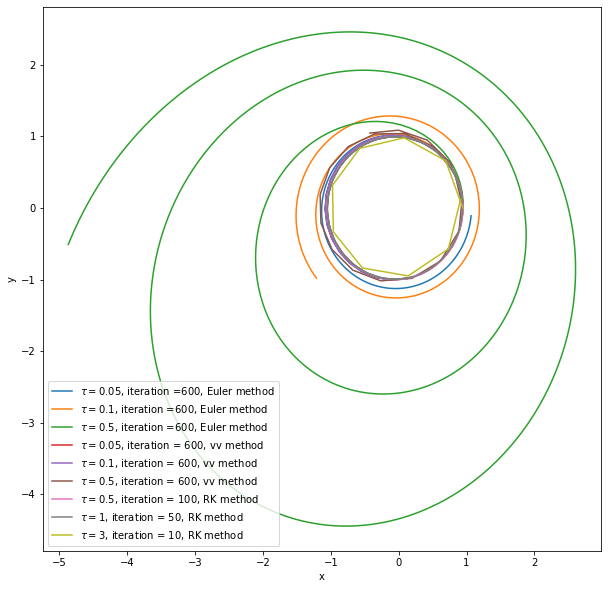

In [ ]:
plt.figure(figsize=(10,10))

#Euler method
plt.plot(moon_1.xlist,moon_1.ylist,label=fr"$\tau = {moon_1.tau}$, iteration ={moon_1.iteration}, Euler method")
plt.plot(moon_2.xlist,moon_2.ylist,label=fr"$\tau = {moon_2.tau}$, iteration ={moon_2.iteration}, Euler method")
plt.plot(moon_3.xlist,moon_3.ylist,label=fr"$\tau = {moon_3.tau}$, iteration ={moon_3.iteration}, Euler method")

# Velocity verlet method
plt.plot(moon_1vv.xlist,moon_1vv.ylist,label=fr"$\tau = {moon_1.tau}$, iteration = {moon_1.iteration}, vv method")
plt.plot(moon_2vv.xlist,moon_2vv.ylist,label=fr"$\tau = {moon_2.tau}$, iteration = {moon_2.iteration}, vv method")
plt.plot(moon_3vv.xlist,moon_3vv.ylist,label=fr"$\tau = {moon_3.tau}$, iteration = {moon_3.iteration}, vv method")

# Runge Kutta 4th order method
plt.plot(x_rk,y_rk,label=fr"$\tau = {tau}$, iteration = {iteration}, RK method")
plt.plot(x_rk1,y_rk1,label=fr"$\tau = {tau1}$, iteration = {iteration1}, RK method")
plt.plot(x_rk3,y_rk3,label=fr"$\tau = {tau3}$, iteration = {iteration3}, RK method")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We can see the performance of Runge Kutta 4th order method is the best 

However, if the $\tau$ value and iteration is set to be too large, the simulation would deviate a lot from the actual result. 

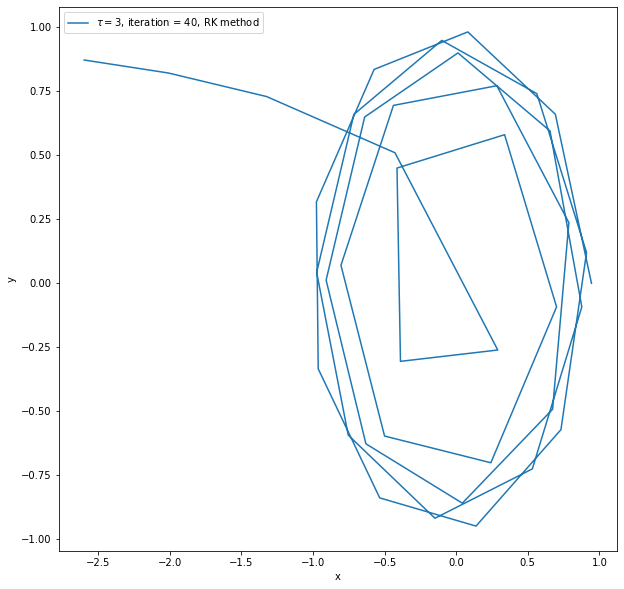

In [ ]:
tau3 = 3
iteration3 = 40
x_rk3=[a*(1-e)]
y_rk3=[y]
vx_rk3=[v_x]
vy_rk3=[v_y]
t_rk3=[0]

x_rk3,y_rk3,vx_rk3,vy_rk3,t_rk3 = Runge_Kutta_4th_order(x_rk3,y_rk3,vx_rk3,vy_rk3,t_rk3,tau3,iteration3,mu=mu)

plt.figure(figsize=(10,10))
plt.plot(x_rk3,y_rk3,label=fr"$\tau = {tau3}$, iteration = {iteration3}, RK method")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Question 2 

As $Area = \int_{t_1}^{t_2} \frac{1}{2} r^2 \frac{d \theta}{dt} dt$ and by defintion of angular momentum, $l = mr^2 \frac{d \theta}{dt}$, we can get 
$$\frac{d \theta}{dt} = \frac{l}{mr^2}$$
and the integral would become 
$$Area = \int_{t_1}^{t_2} \frac{1}{2} r^2 \frac{l}{mr^2} dt = \int_{t_1}^{t_2} \frac{1}{2} \frac{l}{m} dt$$
With discretization, the integral could be, 
$$Area = \sum_{t=t_1}^{t_2} \frac{1}{2} \frac{l}{m} $$
and $l = mv^2r$ (conservation of angular momentum) and mass is conserved, 
$$Area = \sum_{t=t_1}^{t_2} \frac{1}{2} vr $$


In [ ]:
tau = 0.5
iteration = 60
x_rk=[a*(1-e)]
y_rk=[y]
vx_rk=[v_x]
vy_rk=[v_y]
t_rk=[0]

x_rk,y_rk,vx_rk,vy_rk,t_rk = Runge_Kutta_4th_order(x_rk,y_rk,vx_rk,vy_rk,t_rk,tau,iteration,mu=0.05288)

For $\tau = 0.5$, it takes around 60 iterations (57-58 to be exact) to complete 1 revolution. Therefore, 2 iterations would represent 1 day.

In the following part, I would randomly pick **10 starting points k**, where $0\le k < 58$ (the upper bound is set to be 58 to prevent +1 leading to list index goes out of range), and check whether the area sweept through would be (appoximately) the same. 

In [ ]:
sum_list = []

for i in range(0,10):
  random_index = np.random.randint(0,iteration-1)
  dA1 = 0.5*np.sqrt(vx_rk[random_index]**2+vy_rk[random_index]**2)*np.sqrt(x_rk[random_index]**2+y_rk[random_index]**2)
  dA2 = 0.5*np.sqrt(vx_rk[random_index+1]**2+vy_rk[random_index+1]**2)*np.sqrt(x_rk[random_index+1]**2+y_rk[random_index+1]**2)
  sum_list.append(dA1+dA2)

In [ ]:
for i in sum_list:
  print(np.round(i,3))

0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23
0.23


As we can see from the result, the values of area obtained would be the same after rounding off to 2 demical places. 
Therefore, the Kepler's 2nd law is proved, though the accuracy of the result can be improved by using a smaller $\tau$ value. 